## Install modules to environment

In [1]:
%pip install pandas numpy requests seaborn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.strategies.flowSignalStrategy import FlowSignalStrategy

from Backtesting.backtest import Backtest

from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"


In [5]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2020, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2023, 12, 31, 23, 59).timestamp() * 1000)

ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
ft_end_time = int(datetime(2025, 4, 1, 23, 59).timestamp() * 1000)

# bt_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# bt_end_time = int(datetime(2023, 2, 1, 23, 59).timestamp() * 1000)

# ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
# ft_end_time = int(datetime(2024, 2, 1, 23, 59).timestamp() * 1000)


### On Chain Metrics Data 

In [6]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
GLASSNODE_BASE_URL = "https://api.datasource.cybotrade.rs/glassnode"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ASSET = "BTC"
ON_CHAIN_LIMIT = None # Number of data points to fetch

ohlcv_window = "day"
ohlcv_endpoint_category = "market-data"
ohlcv_metric = "price-ohlcv"

netflow_window = "day"
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

exchange_whale_ratio_window = "day"
exchange_whale_ratio_endpoint_category = "flow-indicator"
exchange_whale_ratio_metric = "exchange-whale-ratio"

funding_rates_window = "day"
funding_rates_endpoint_category = "market-data"
funding_rates_metric = "funding-rates"

dormancy_window = "day"
dormancy_endpoint_category = "network-indicator"
dormancy_metric = "dormancy"



In [7]:
def fetch_on_chain_datas(start_time, end_time, file_name):

    on_chain_fetcher_ohlcv = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, ohlcv_endpoint_category, ohlcv_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_ohlcv.fetch_ohlcv(ohlcv_window, start_time, end_time)

    on_chain_fetcher_netflow = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_netflow.fetch_netflow(netflow_window, start_time, end_time)

    on_chain_fetecher_exchange_whale_ratio = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, exchange_whale_ratio_endpoint_category, exchange_whale_ratio_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetecher_exchange_whale_ratio.fetch_exchange_whale_ratio(exchange_whale_ratio_window, start_time, end_time)

    on_chain_fetcher_funding_rates = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, funding_rates_endpoint_category, funding_rates_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_funding_rates.fetch_funding_rates(funding_rates_window, start_time, end_time)

    on_chain_fetcher_without_exchange_dormancy = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, dormancy_endpoint_category, dormancy_metric, ON_CHAIN_LIMIT)
    on_chain_fetcher_without_exchange_dormancy.fetch_dormancy(dormancy_window, start_time, end_time)

    print("📁 Ohlcv path:", on_chain_fetcher_ohlcv.saved_filepath)
    print("📁 Netflow path:", on_chain_fetcher_netflow.saved_filepath)
    print("📁 Whale Ratio path:", on_chain_fetecher_exchange_whale_ratio.saved_filepath)
    print("📁 Funding Rates path:", on_chain_fetcher_funding_rates.saved_filepath)
    print("📁 Dormancy path:", on_chain_fetcher_without_exchange_dormancy.saved_filepath)

    csvs_to_merge = [
    on_chain_fetcher_ohlcv.saved_filepath,
    on_chain_fetcher_netflow.saved_filepath,
    on_chain_fetecher_exchange_whale_ratio.saved_filepath,
    on_chain_fetcher_funding_rates.saved_filepath,
    on_chain_fetcher_without_exchange_dormancy.saved_filepath
    ]

    CryptoQuantFetcher.merge_selected_csv_files(csvs_to_merge, file_name) 




### Fetch hmm model data

In [8]:
backtest_dataset_file_path = "datasets/backtest_data.csv"
forwardtest_dataset_file_path = "datasets/forwardtest_data.csv"

fetch_on_chain_datas(bt_start_time, bt_end_time, backtest_dataset_file_path)
fetch_on_chain_datas(ft_start_time, ft_end_time, forwardtest_dataset_file_path)

Fetching market-data/price-ohlcv data for btc from binance with window 'day'...
Using range: 2019-12-31 16:00:00 to 2023-12-31 15:59:00
✅ Retrieved 1461 records. Total so far: 1461
Using range: 2023-12-31 00:00:01 to 2023-12-31 15:59:00
❌ Error 400: {"error":"'limit' must be between [1, 100000]"}
💾 Saved to datasets/binance_price-ohlcv_day_Training data_1703980801000_to_1704038340000.csv with 1461 rows.
                open      high       low     close       volume
timestamp                                                      
2023-12-27  42508.93  43677.00  42098.69  43428.85  36191.21136
2023-12-28  43428.86  43787.57  42241.79  42563.76  35150.52485
2023-12-29  42563.76  43111.00  41300.00  42066.95  42597.18912
2023-12-30  42066.94  42612.32  41520.30  42140.28  22906.57818
2023-12-31  42140.29  42899.00  41965.84  42283.58  23585.91603
Fetching exchange-flows/netflow data for btc from binance with window 'day'...
Using range: 2019-12-31 16:00:00 to 2023-12-31 15:59:00
✅ Retrieve

## Instantiate Strategy

      timestamp      open      high       low     close        volume  \
1    2020-01-02   7200.77   7212.50   6924.74   6965.71  31951.483932   
2    2020-01-03   6965.49   7405.00   6871.04   7344.96  68428.500451   
3    2020-01-04   7345.00   7404.00   7272.21   7354.11  29987.974977   
4    2020-01-05   7354.19   7495.00   7318.00   7358.75  38331.085604   
5    2020-01-06   7357.64   7795.34   7346.76   7758.00  54635.695316   
...         ...       ...       ...       ...       ...           ...   
1456 2023-12-27  42508.93  43677.00  42098.69  43428.85  36191.211360   
1457 2023-12-28  43428.86  43787.57  42241.79  42563.76  35150.524850   
1458 2023-12-29  42563.76  43111.00  41300.00  42066.95  42597.189120   
1459 2023-12-30  42066.94  42612.32  41520.30  42140.28  22906.578180   
1460 2023-12-31  42140.29  42899.00  41965.84  42283.58  23585.916030   

      netflow_total  exchange_whale_ratio  funding_rates  average_dormancy  \
1       -139.598209              0.355568    

         1  -10518.11055522             +nan
         2   -9704.31154012    +813.79901510
         3   -9451.69013585    +252.62140426
         4   -9384.21152597     +67.47860989
         5   -9363.21541974     +20.99610623
         6   -9355.20907244      +8.00634730
         7   -9351.00578079      +4.20329165
         8   -9348.24195480      +2.76382599
         9   -9346.11425261      +2.12770219
        10   -9344.31493272      +1.79931989
        11   -9342.72004987      +1.59488285
        12   -9341.27837729      +1.44167258
        13   -9339.96471069      +1.31366660
        14   -9338.75941573      +1.20529496
        15   -9337.64103460      +1.11838113
        16   -9336.58569870      +1.05533589
        17   -9335.56951974      +1.01617896
        18   -9334.57185216      +0.99766758
        19   -9333.57804924      +0.99380292
        20   -9332.57971842      +0.99833082
        21   -9331.57108051      +1.00863791
        22   -9330.54364617      +1.02743434
        23

Unique states: [1 0 2]
[1 0 2]


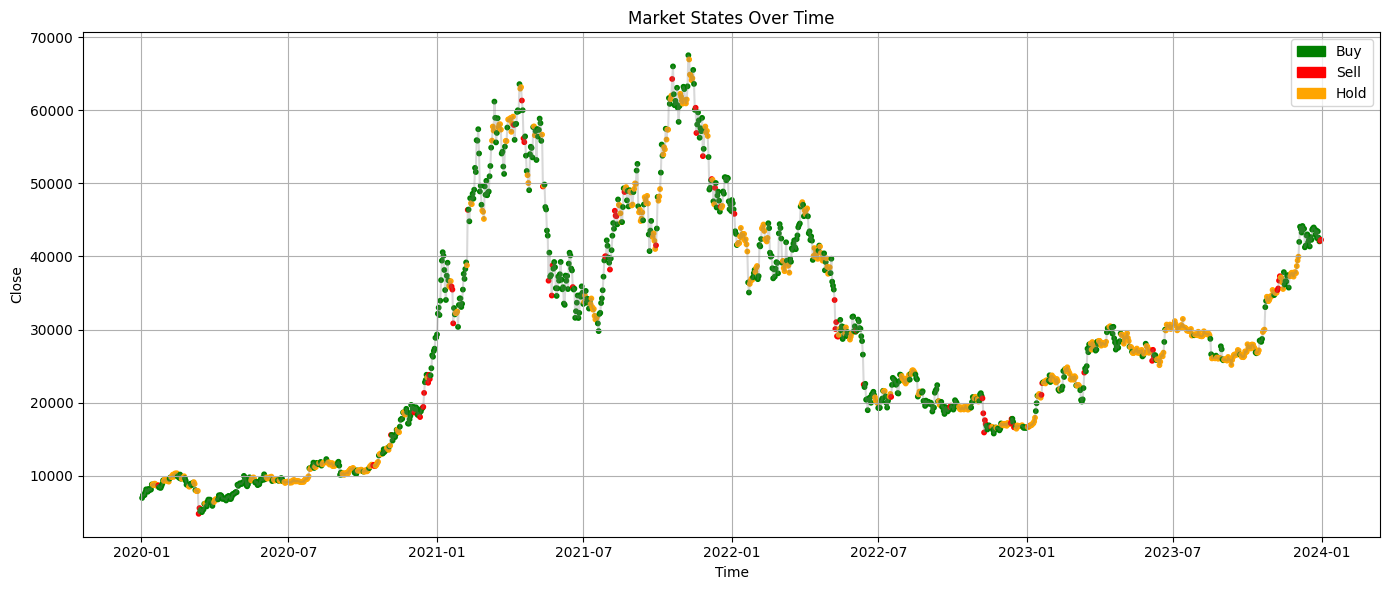

Converged: True
Final log likelihood: -9193.912236724225
State Labels: {1: 'buy', 2: 'sell', 0: 'hold'}
      timestamp      open     close  netflow_total  exchange_whale_ratio  \
1    2020-01-02   7200.77   6965.71    -139.598209              0.355568   
2    2020-01-03   6965.49   7344.96     490.084544              0.356204   
3    2020-01-04   7345.00   7354.11     348.839319              0.359364   
4    2020-01-05   7354.19   7358.75    1599.944352              0.359490   
5    2020-01-06   7357.64   7758.00    1275.399018              0.297318   
...         ...       ...       ...            ...                   ...   
1456 2023-12-27  42508.93  43428.85   -4560.323842              0.461077   
1457 2023-12-28  43428.86  42563.76   -4583.994366              0.330835   
1458 2023-12-29  42563.76  42066.95   -5925.682344              0.345703   
1459 2023-12-30  42066.94  42140.28   15040.904774              0.147352   
1460 2023-12-31  42140.29  42283.58    7465.803908          

/Users/winnee/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0250
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0014
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011


In [9]:
mfs = FlowSignalStrategy(backtest_dataset_file_path, backtest_dataset_file_path)

In [10]:
bt = Backtest(mfs, 10, 0.006)

Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              ...
1456 2023-12-27      43428.85     45078.287852
1457 2023-12-28      42563.76     45041.427508
1458 2023-12-29      42066.95     44953.667810
1459 2023-12-30      42140.28     44896.737851
1460 2023-12-31      42283.58     44627.237476

[1401 rows x 3 columns]


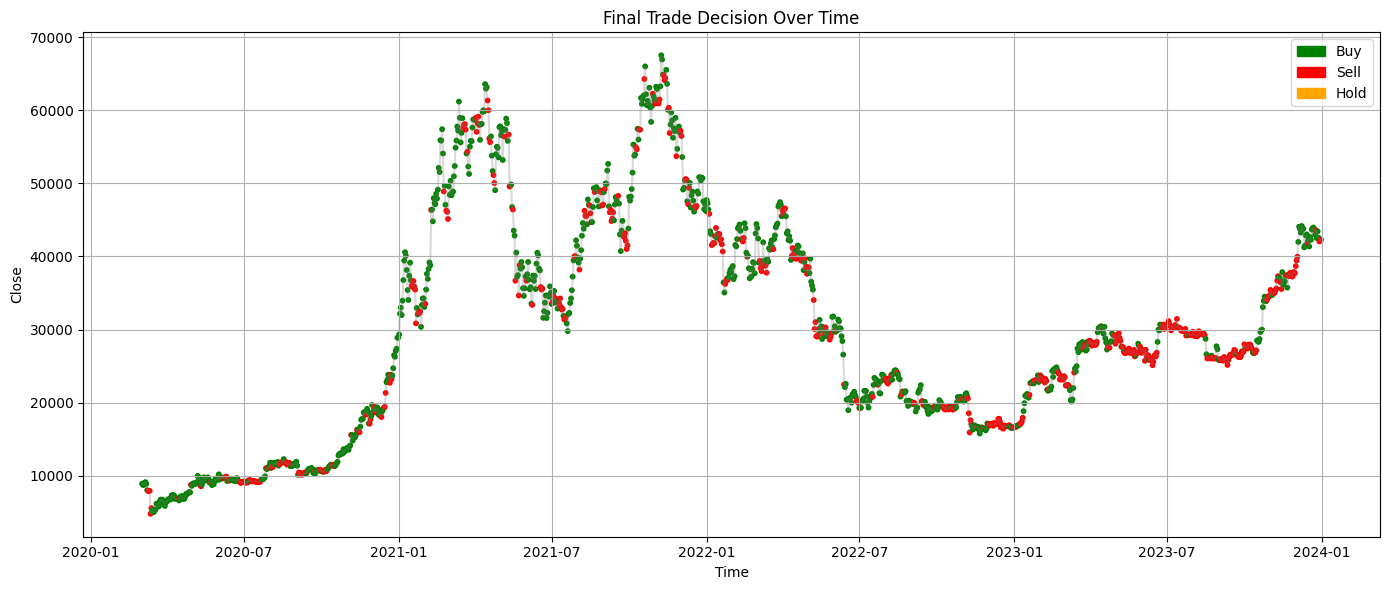

In [11]:
bt.run()

In [12]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2020-03-02 00:00:00
End Trade Date: 2023-12-31 00:00:00
Number of Trades: 635
Sharpe Ratio: -0.676665
Max Drawdown (%): -3.463677
Trade per Interval: 0.453571
Trading Fees: 0.006


In [13]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv


bullish range:  [0.2 0.4 0.6 0.8]
bearish range:  [0.2 0.4 0.6 0.8]
Running with bullish=0.20, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              ...
1456 2023-12-27      43428.85     45078.287852
1457 2023-12-28      42563.76     45041.427508
1458 2023-12-29      42066.95     44953.667810
1459 2023-12-30      42140.28     44896.737851
1460 2023-12-31      42283.58     44627.237476

[1401 rows x 3 columns]

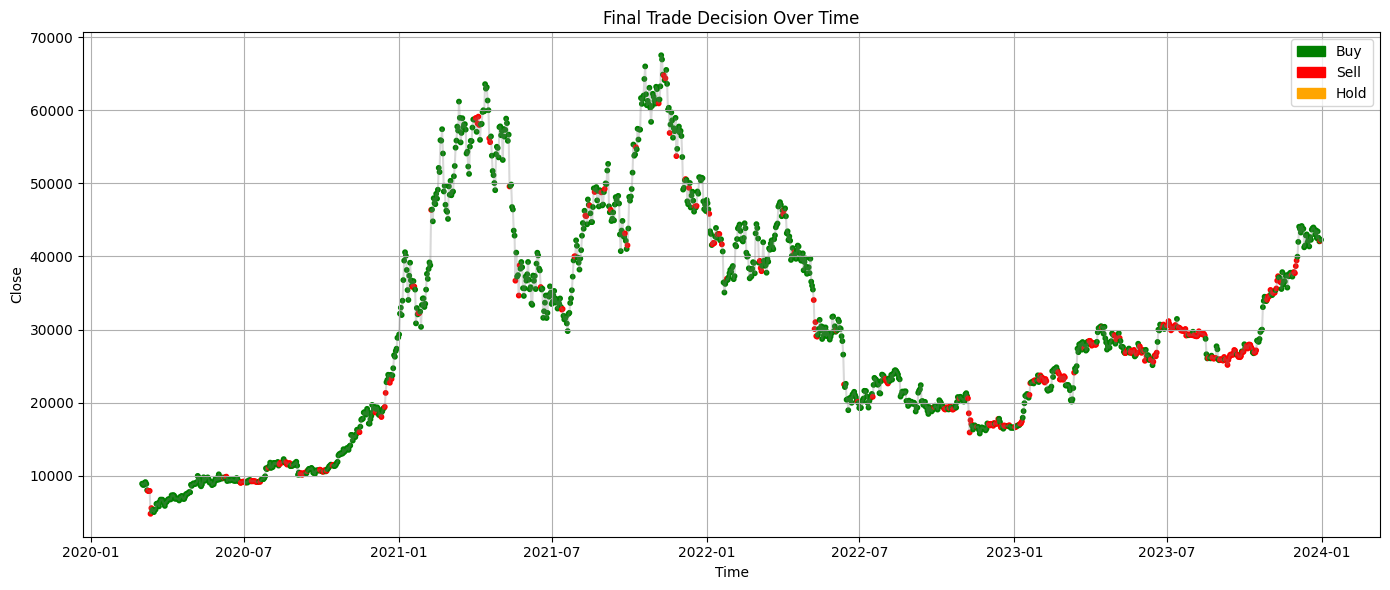

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 493, 'Sharpe Ratio': np.float64(-0.511356), 'Max Drawdown (%)': np.float64(-3.065096), 'Trade per Interval': np.float64(0.352143), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.20: -0.511356
Running with bullish=0.20, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

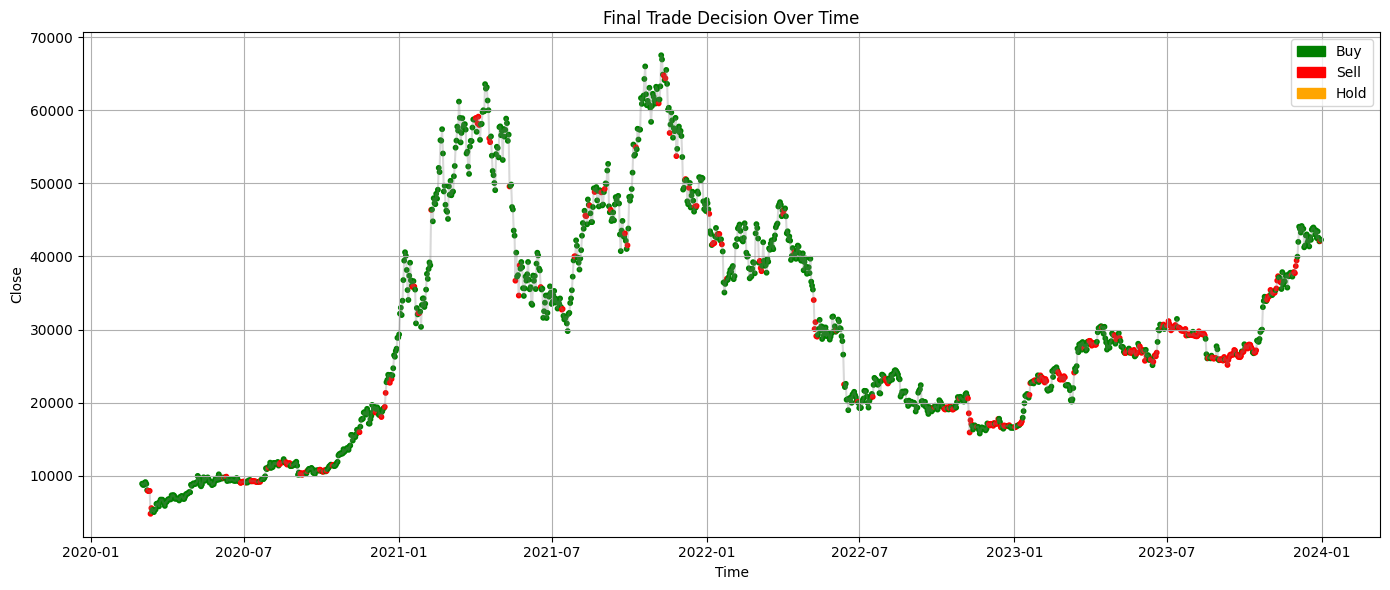

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 493, 'Sharpe Ratio': np.float64(-0.511356), 'Max Drawdown (%)': np.float64(-3.065096), 'Trade per Interval': np.float64(0.352143), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.40: -0.511356
Running with bullish=0.20, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

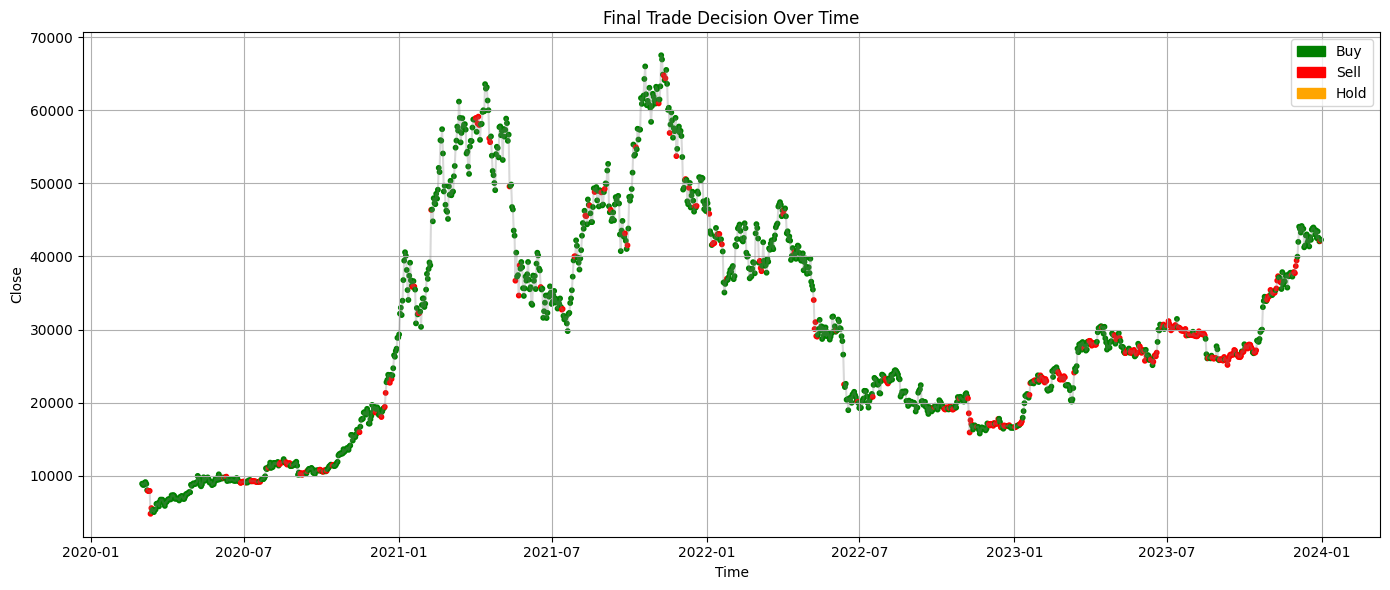

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 493, 'Sharpe Ratio': np.float64(-0.511356), 'Max Drawdown (%)': np.float64(-3.065096), 'Trade per Interval': np.float64(0.352143), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.60: -0.511356
Running with bullish=0.20, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

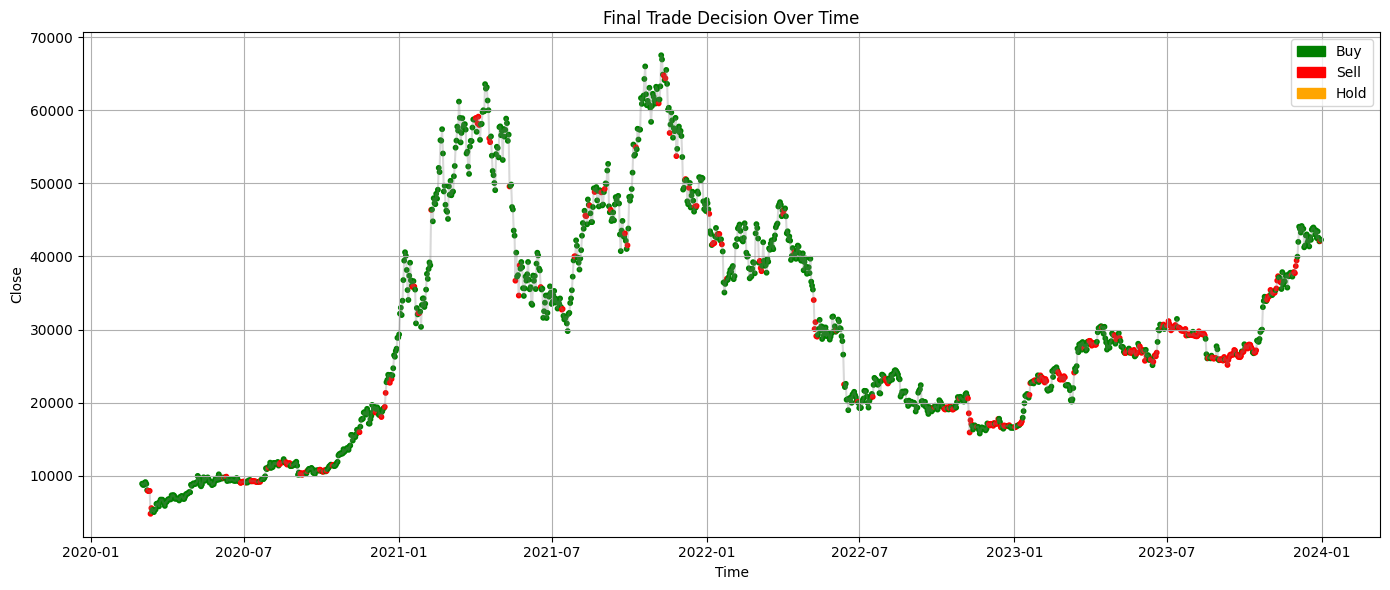

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 493, 'Sharpe Ratio': np.float64(-0.511356), 'Max Drawdown (%)': np.float64(-3.065096), 'Trade per Interval': np.float64(0.352143), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.80: -0.511356
Running with bullish=0.40, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

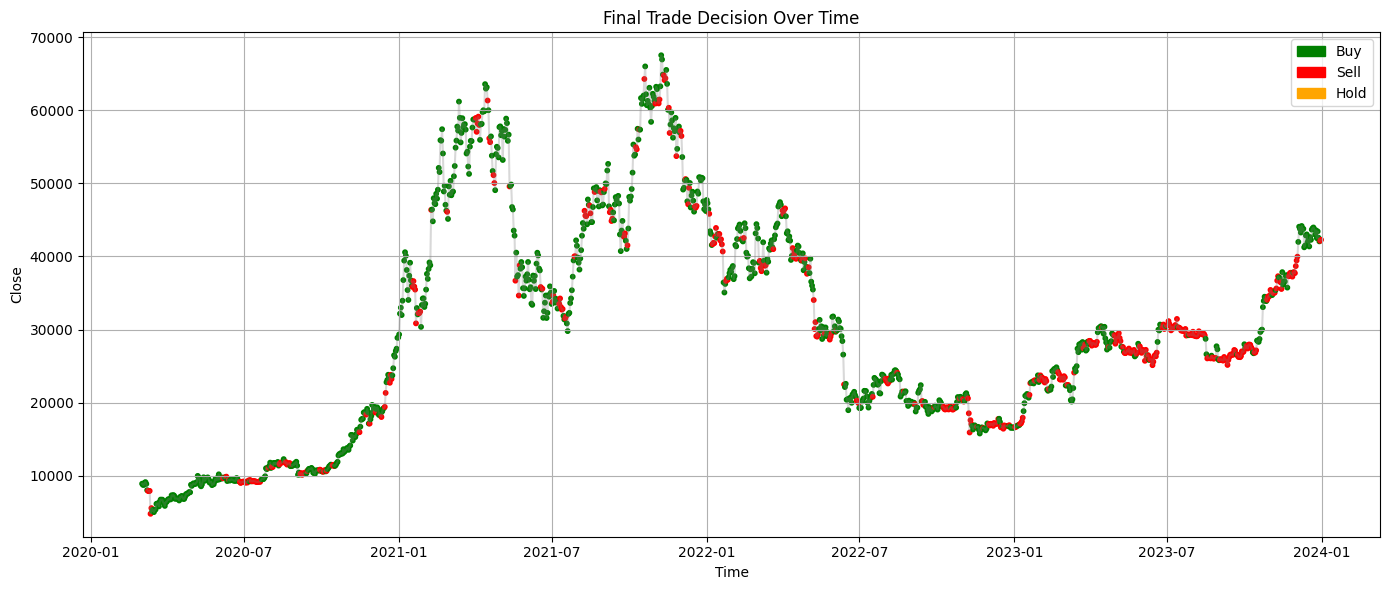

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 567, 'Sharpe Ratio': np.float64(-0.594874), 'Max Drawdown (%)': np.float64(-3.333008), 'Trade per Interval': np.float64(0.405), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.20: -0.594874
Running with bullish=0.40, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              ...


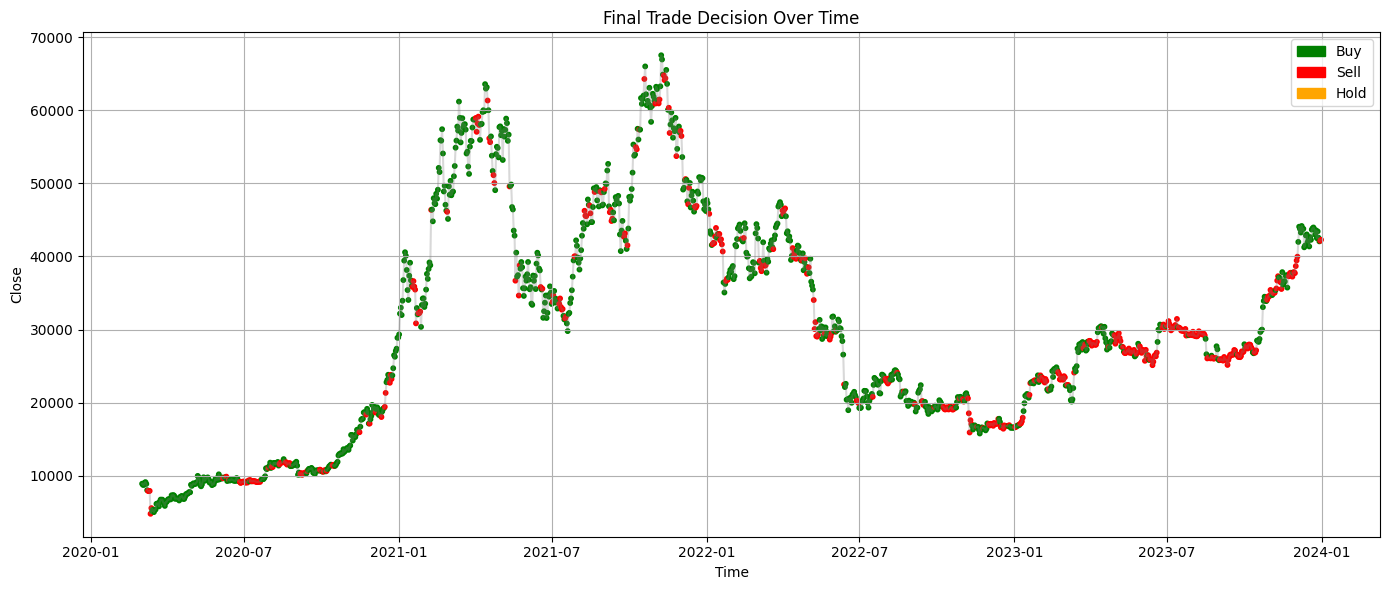

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 567, 'Sharpe Ratio': np.float64(-0.594874), 'Max Drawdown (%)': np.float64(-3.333008), 'Trade per Interval': np.float64(0.405), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.40: -0.594874
Running with bullish=0.40, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              ...


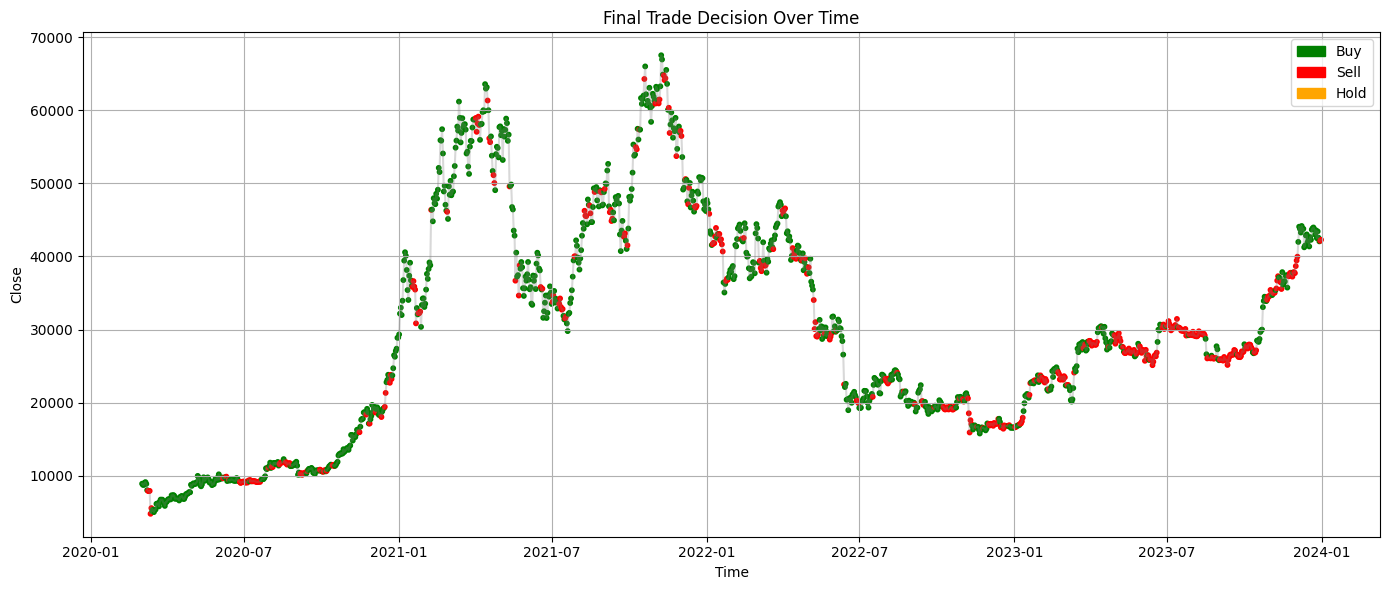

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 567, 'Sharpe Ratio': np.float64(-0.594874), 'Max Drawdown (%)': np.float64(-3.333008), 'Trade per Interval': np.float64(0.405), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.60: -0.594874
Running with bullish=0.40, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              ...


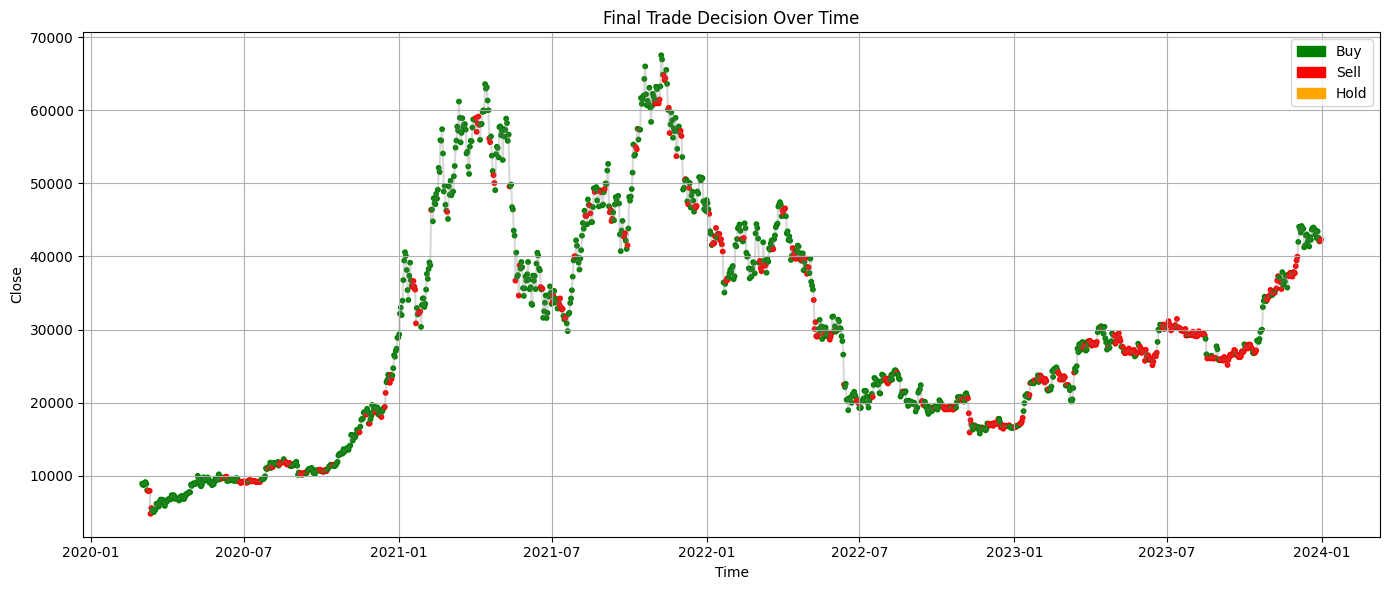

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 555, 'Sharpe Ratio': np.float64(-0.610093), 'Max Drawdown (%)': np.float64(-3.381333), 'Trade per Interval': np.float64(0.396429), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.80: -0.610093
Running with bullish=0.60, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

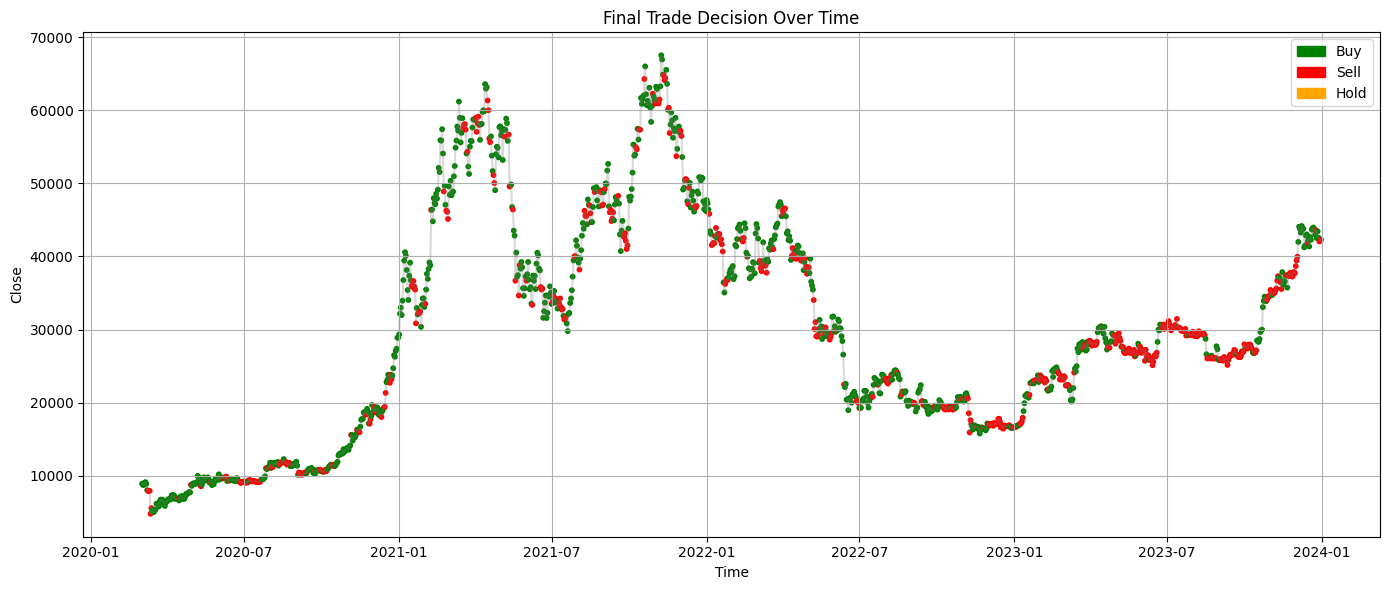

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 635, 'Sharpe Ratio': np.float64(-0.676665), 'Max Drawdown (%)': np.float64(-3.463677), 'Trade per Interval': np.float64(0.453571), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.20: -0.676665
Running with bullish=0.60, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

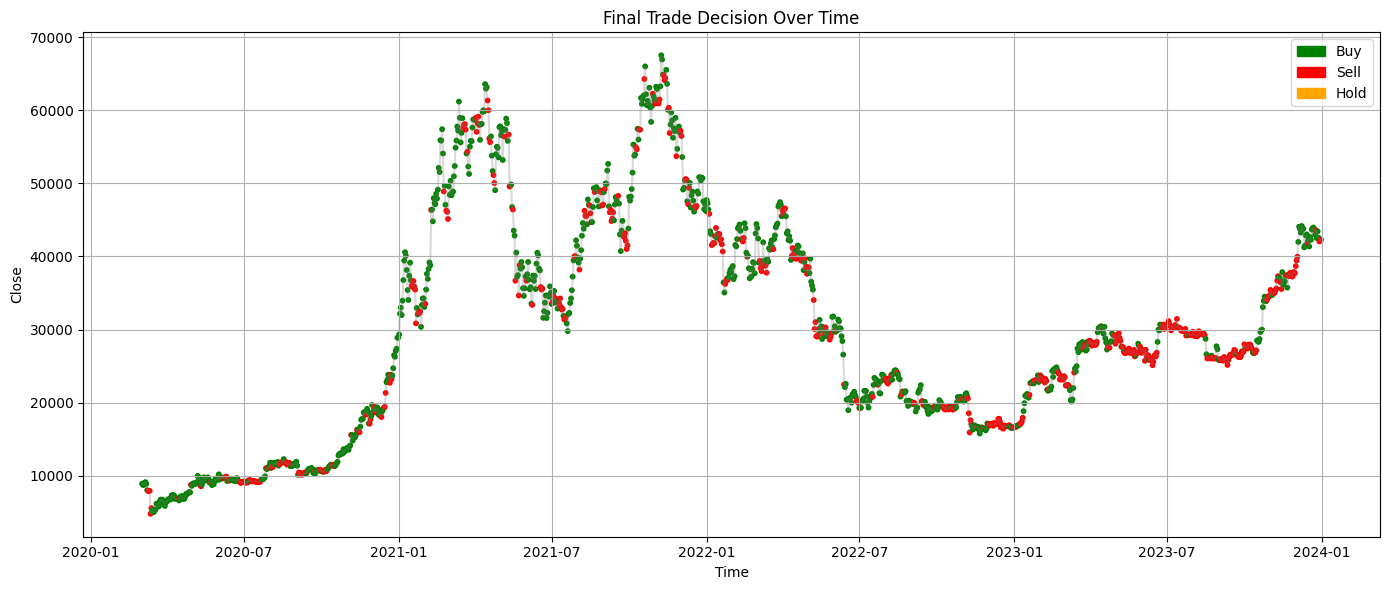

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 635, 'Sharpe Ratio': np.float64(-0.676665), 'Max Drawdown (%)': np.float64(-3.463677), 'Trade per Interval': np.float64(0.453571), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.40: -0.676665
Running with bullish=0.60, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

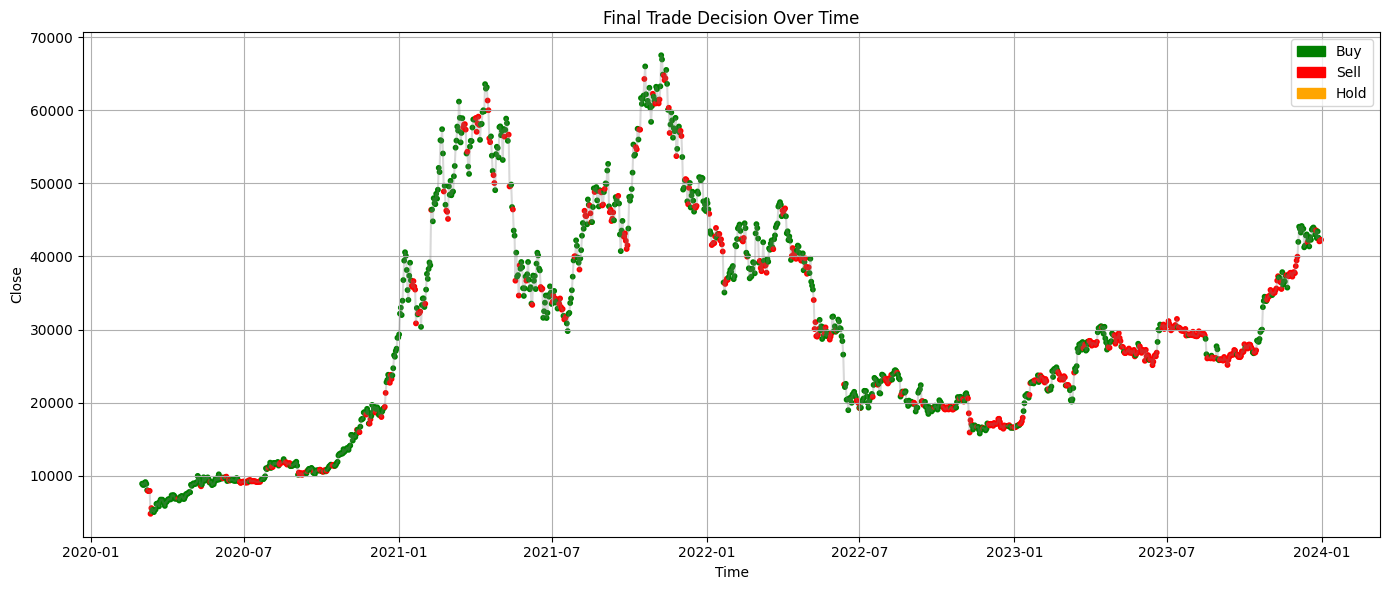

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 623, 'Sharpe Ratio': np.float64(-0.706588), 'Max Drawdown (%)': np.float64(-3.48092), 'Trade per Interval': np.float64(0.445), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.60: -0.706588
Running with bullish=0.60, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              ...
1

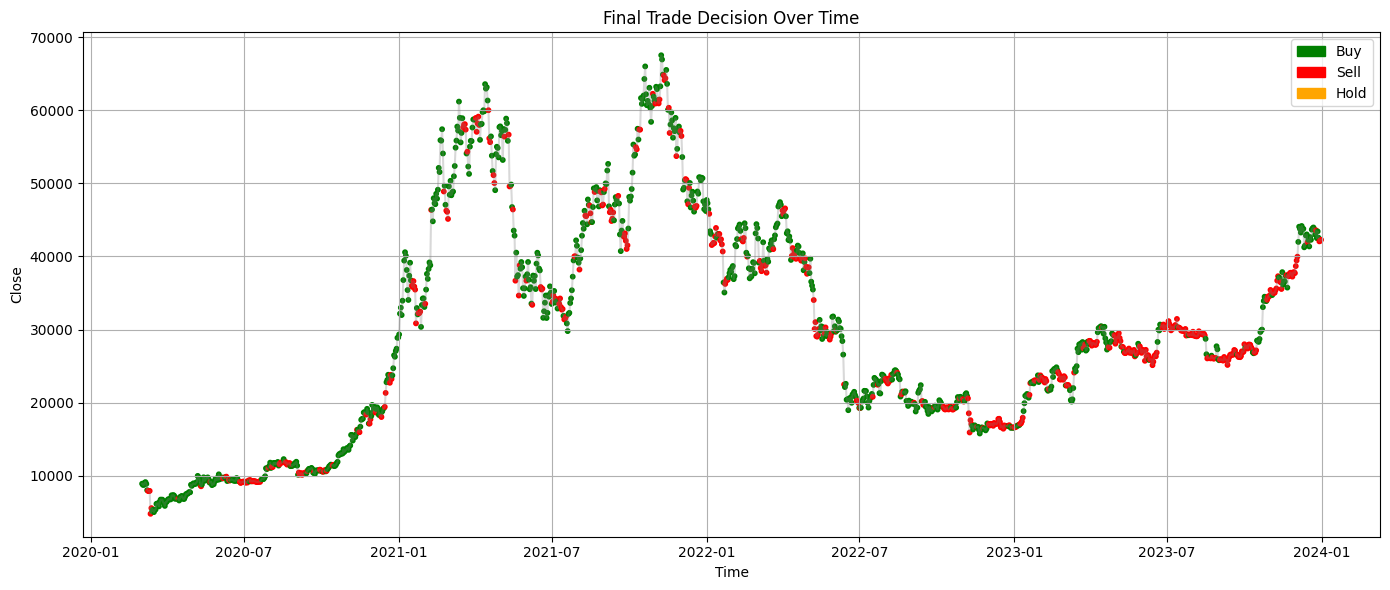

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 619, 'Sharpe Ratio': np.float64(-0.739638), 'Max Drawdown (%)': np.float64(-3.533936), 'Trade per Interval': np.float64(0.442143), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.80: -0.739638
Running with bullish=0.80, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

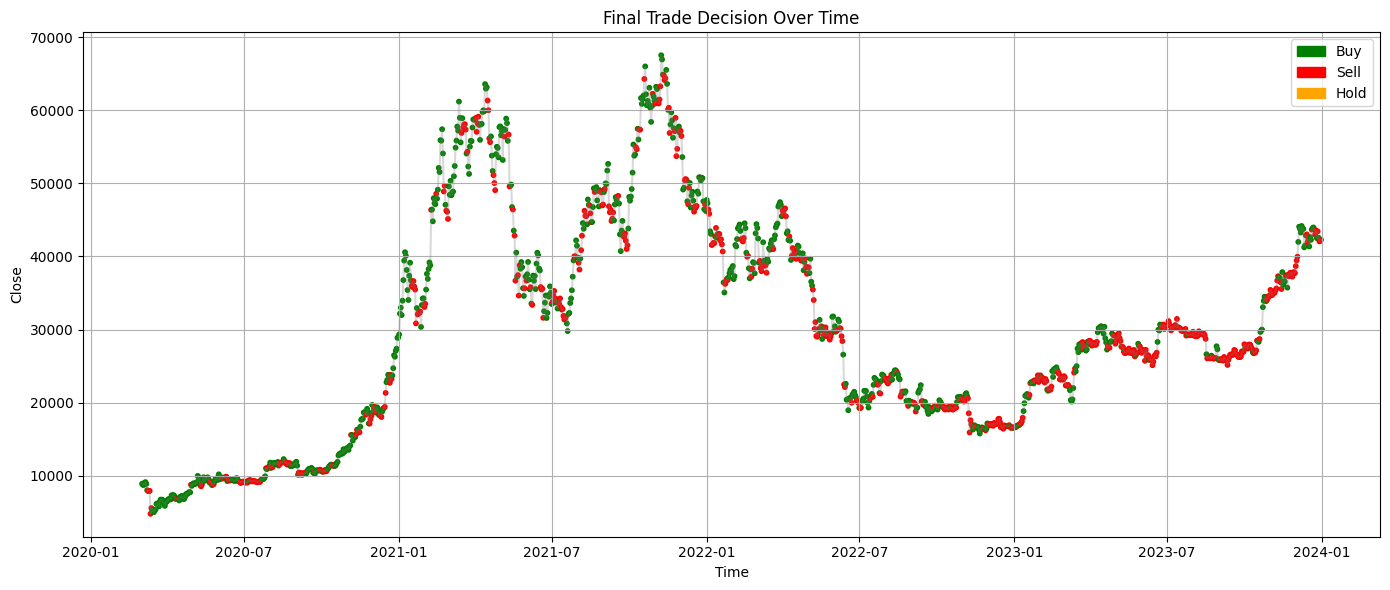

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 699, 'Sharpe Ratio': np.float64(-0.947645), 'Max Drawdown (%)': np.float64(-3.607749), 'Trade per Interval': np.float64(0.499286), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.20: -0.947645
Running with bullish=0.80, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

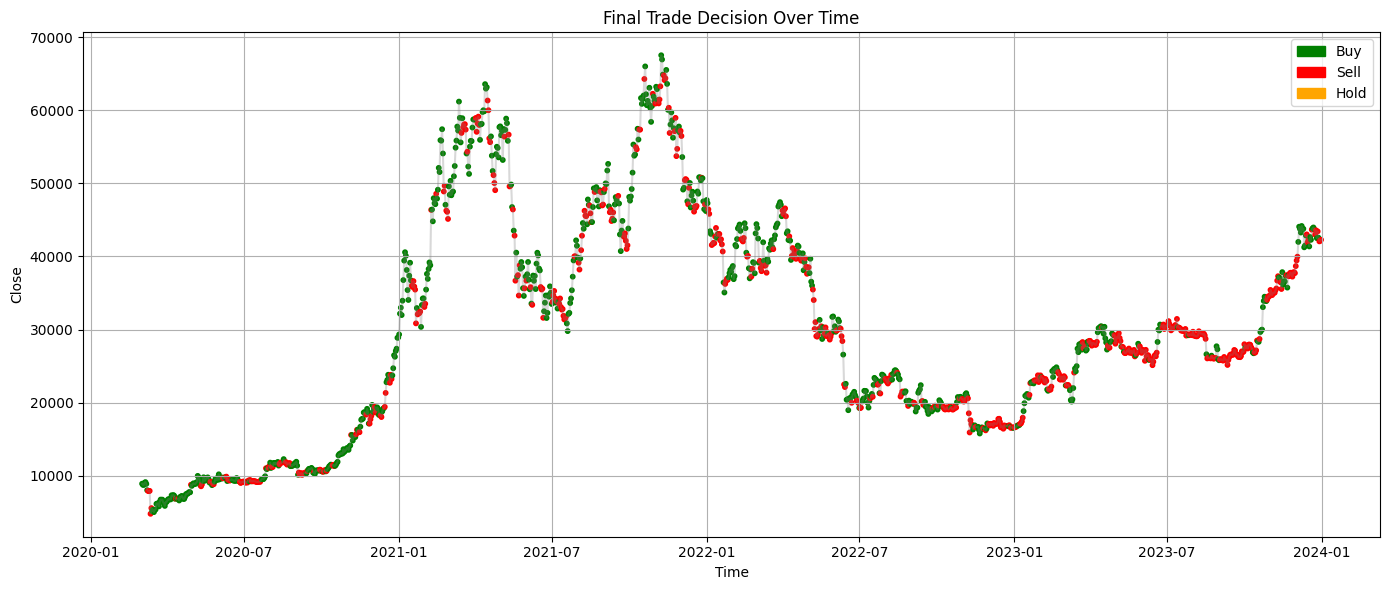

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 699, 'Sharpe Ratio': np.float64(-0.953171), 'Max Drawdown (%)': np.float64(-3.620285), 'Trade per Interval': np.float64(0.499286), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.40: -0.953171
Running with bullish=0.80, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

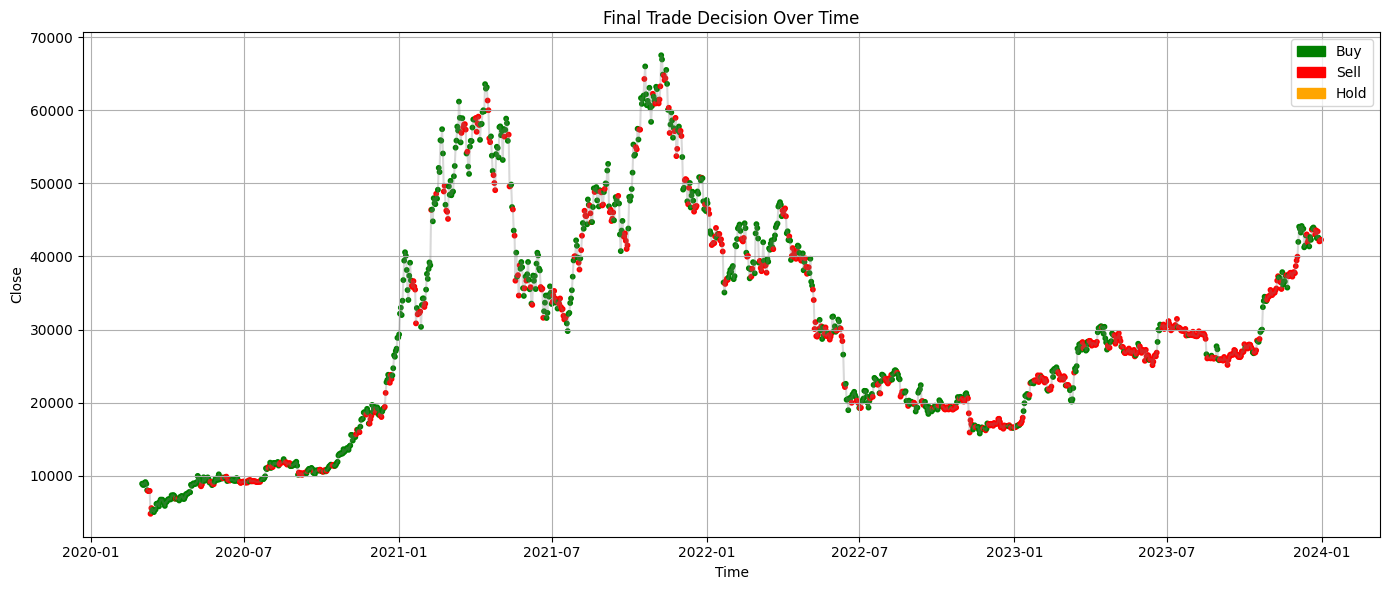

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 687, 'Sharpe Ratio': np.float64(-0.982373), 'Max Drawdown (%)': np.float64(-3.637527), 'Trade per Interval': np.float64(0.490714), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.60: -0.982373
Running with bullish=0.80, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1401, 60, 5), y=(1401, 1)
🕒 Predicting for 1401 hours ≈ 58.4 days
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-03-01       8531.88      9532.027081
61   2020-03-02       8915.24      9392.602988
62   2020-03-03       8760.07      9128.006919
63   2020-03-04       8750.87      8853.151718
64   2020-03-05       9054.68      8644.051330
...         ...           ...              .

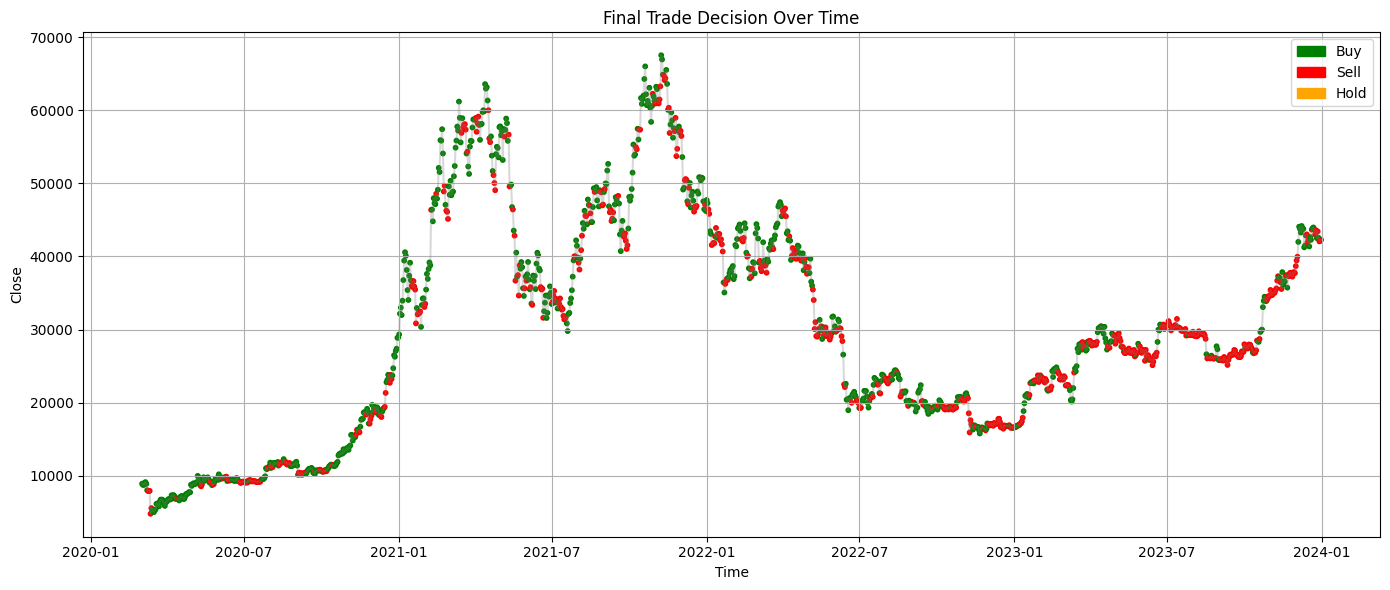

{'Start Trade Date': Timestamp('2020-03-02 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 683, 'Sharpe Ratio': np.float64(-1.015288), 'Max Drawdown (%)': np.float64(-3.690544), 'Trade per Interval': np.float64(0.487857), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.80: -1.015288
[[np.float64(-0.511356), np.float64(-0.511356), np.float64(-0.511356), np.float64(-0.511356)], [np.float64(-0.594874), np.float64(-0.594874), np.float64(-0.594874), np.float64(-0.610093)], [np.float64(-0.676665), np.float64(-0.676665), np.float64(-0.706588), np.float64(-0.739638)], [np.float64(-0.947645), np.float64(-0.953171), np.float64(-0.982373), np.float64(-1.015288)]]
heatmap_data:            0.2       0.4       0.6       0.8
0.2 -0.511356 -0.511356 -0.511356 -0.511356
0.4 -0.594874 -0.594874 -0.594874 -0.610093
0.6 -0.676665 -0.676665 -0.706588 -0.739638
0.8 -0.947645 -0.953171 -0.982373 -1.015288


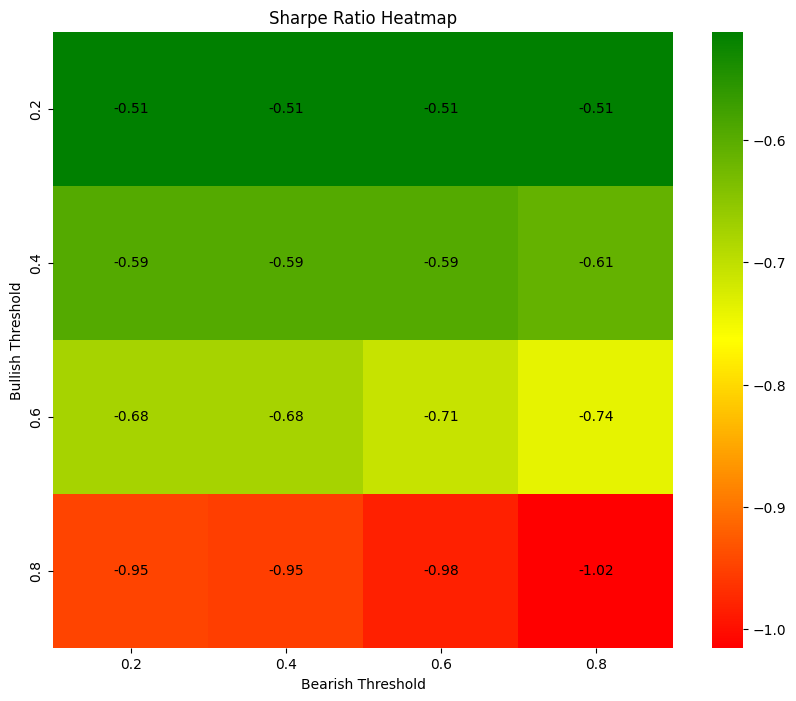

In [14]:
import numpy as np

bt.run_backtest_heatmap(bullish_range=np.linspace(0.2, 0.8, 4), bearish_range=np.linspace(0.2, 0.8, 4), metric='Sharpe Ratio' )


<Axes: >

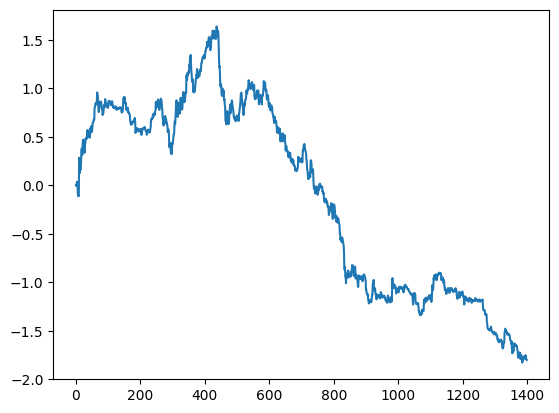

In [15]:
import pandas as pd

test_df = pd.read_csv("backtest_trade_logs.csv")
test_df["equity"].plot()



## Perform Forward Testing Using Best Threshold

### Set forward testing dataset

In [16]:
bt.set_predict_filepath(forwardtest_dataset_file_path, forwardtest_dataset_file_path)

### Set best threshold

In [17]:
bt.set_best_thresholds(bull_thres=0.4, bear_thres=0.4)

### Run testing using forward dataset

Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
✅ Testing set shape: X=(397, 60, 5), y=(397, 1)
🕒 Predicting for 397 hours ≈ 16.5 days
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
     timestamp  actual_close  predicted_close
60  2024-03-01      62387.90     59132.910187
61  2024-03-02      61987.28     61065.369537
62  2024-03-03      63113.97     62288.707498
63  2024-03-04      68245.71     63247.887758
64  2024-03-05      63724.01     64886.200888
..         ...           ...              ...
452 2025-03-28      84424.38     85434.984786
453 2025-03-29      82648.54     85432.053605
454 2025-03-30      82389.99     84861.370681
455 2025-03-31      82550.01     84036.228376
456 2025-04-01      85158.34     83210.659853

[397 rows x 3 columns]


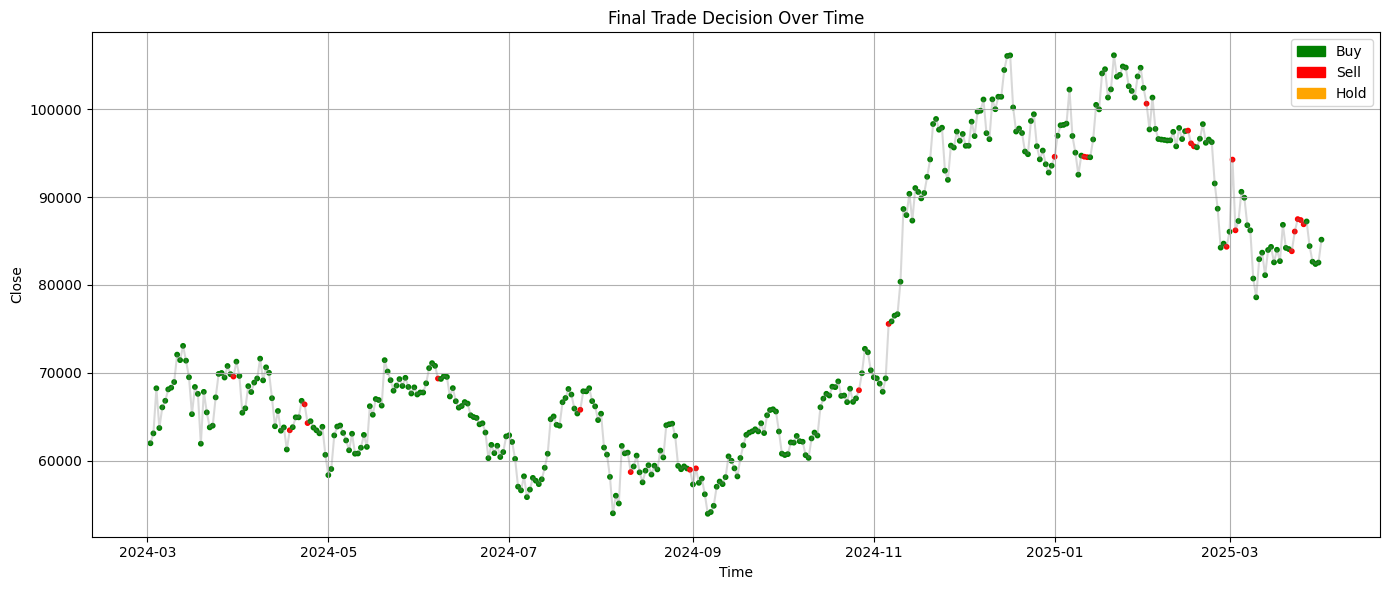

In [18]:
bt.run()

In [19]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")


Start Trade Date: 2024-03-02 00:00:00
End Trade Date: 2025-04-01 00:00:00
Number of Trades: 69
Sharpe Ratio: 0.120839
Max Drawdown (%): -0.429568
Trade per Interval: 0.174242
Trading Fees: 0.006


In [20]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
